In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse=pd.read_csv(mouse_drug_data_to_load)
clinical=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_combined=pd.merge(mouse, clinical, on="Mouse ID",how="outer")
# Display the data table for preview
mouse_clinical_combined.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

Summary_mean=mouse_clinical_combined.reset_index().pivot_table(values="Tumor Volume (mm3)",index=["Drug","Timepoint"],aggfunc="mean",fill_value=1)
# Convert to DataFrame
Summary_mean.head()
# Preview DataFrame


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
from scipy.stats import sem
Summary_se=mouse_clinical_combined.reset_index().pivot_table(values="Tumor Volume (mm3)",index=["Drug","Timepoint"],aggfunc=sem,fill_value=1)
# Convert to DataFrame
Summary_se.head()
# Convert to DataFrame

# Preview DataFrame



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
Summary_reformat=mouse_clinical_combined.reset_index().pivot_table(values="Tumor Volume (mm3)",index=["Timepoint"],columns=["Drug"],aggfunc="mean",fill_value=1)
# Convert to DataFrame
Summary_reformat_df=pd.DataFrame(Summary_reformat).reset_index()
# Preview that Reformatting worked
Summary_reformat_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


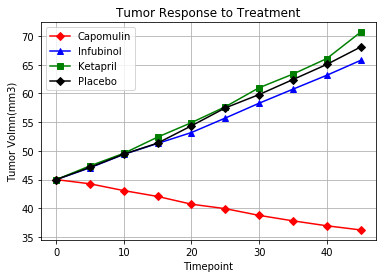

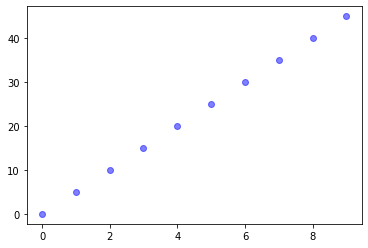

In [7]:
# Generate the Plot (with Error Bars)
Timepoint=Summary_reformat_df["Timepoint"]
Drug_Capomulin=Summary_reformat_df["Capomulin"]
Drug_Infubinol=Summary_reformat_df["Infubinol"]
Drug_Ketapril=Summary_reformat_df["Ketapril"]
Drug_Placebo=Summary_reformat_df["Placebo"]
Chart1,=plt.plot(Timepoint,Drug_Capomulin,marker="D",color="red",label="Capomulin")
Chart2,=plt.plot(Timepoint,Drug_Infubinol,marker="^",color="blue",label="Infubinol")
Chart3,=plt.plot(Timepoint,Drug_Ketapril,marker="s",color="green",label="Ketapril")
Chart4,=plt.plot(Timepoint,Drug_Placebo,marker="D",color="black",label="Placebo")

plt.legend(handles=[Chart1,Chart2,Chart3,Chart4,], loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volmn(mm3)")
plt.grid()
# Save the Figure




means_1=[np.mean(s) for s in Timepoint]
standard_errors_1 = [sem(s) for s in Timepoint]
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(means_1)), means_1, standard_errors_1, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")

plt.savefig('Tumor Response.png')

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
 

Summary_metastatic=mouse_clinical_combined.reset_index().pivot_table(values="Metastatic Sites",index=["Drug","Timepoint"],aggfunc="mean",fill_value=1)
# Convert to DataFrame
Summary_metastatic.head()
# Preview DataFrame



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 


Summary_metastatic_se=mouse_clinical_combined.reset_index().pivot_table(values="Metastatic Sites",index=["Drug","Timepoint"],aggfunc=sem,fill_value=1)
# Convert to DataFrame
Summary_metastatic_se.head()
# Preview DataFrame



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
Summary_reformat_meta=mouse_clinical_combined.reset_index().pivot_table(values="Metastatic Sites",index="Timepoint",columns="Drug",aggfunc="mean",fill_value=1)
# Convert to DataFrame
Summary_reformat_meta_df=pd.DataFrame(Summary_reformat_meta).reset_index()
# Preview that Reformatting worked
Summary_reformat_meta_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


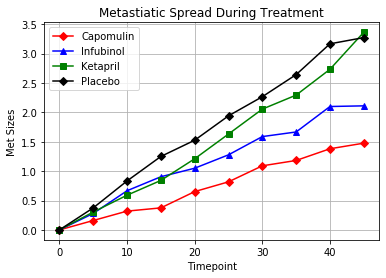

In [12]:
# Generate the Plot (with Error Bars)
Timepoint_meta=Summary_reformat_meta_df["Timepoint"]
Drug_Capomulin_meta=Summary_reformat_meta_df["Capomulin"]
Drug_Infubinol_meta=Summary_reformat_meta_df["Infubinol"]
Drug_Ketapril_meta=Summary_reformat_meta_df["Ketapril"]
Drug_Placebo_meta=Summary_reformat_meta_df["Placebo"]
Chart1_meta,=plt.plot(Timepoint_meta,Drug_Capomulin_meta,marker="D",color="red",label="Capomulin")
Chart2_meta,=plt.plot(Timepoint_meta,Drug_Infubinol_meta,marker="^",color="blue",label="Infubinol")
Chart3_meta,=plt.plot(Timepoint_meta,Drug_Ketapril_meta,marker="s",color="green",label="Ketapril")
Chart4_meta,=plt.plot(Timepoint_meta,Drug_Placebo_meta,marker="D",color="black",label="Placebo")

plt.legend(handles=[Chart1_meta,Chart2_meta,Chart3_meta,Chart4_meta,], loc="best")
plt.title("Metastiatic Spread During Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Met Sizes")
plt.grid()
# Save the Figure

# Save the Figure

# Show the Figure
plt.savefig('Metastiatic.png')


In [ ]:
means_1=[np.mean(s) for s in Summary_reformat["Capomulin"]]
standard_errors_1 = [sem(s) for s in Summary_reformat["Capomulin"]]
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(means_1)), means_1, standard_errors_1, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Summary_mouse_count=mouse_clinical_combined.reset_index().pivot_table(values="Mouse ID",index=["Drug","Timepoint"],aggfunc="count",fill_value=1)
# Convert to DataFrame
Summary_mouse_count.head()
# Convert to DataFrame

# Preview DataFrame


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
Summary_mouse_count_reformat=mouse_clinical_combined.reset_index().pivot_table(values="Mouse ID",index=["Timepoint"],columns=["Drug"],aggfunc="count",fill_value=1)
# Convert to DataFrame
Summary_mouse_count_reformat_df=pd.DataFrame(Summary_mouse_count_reformat).reset_index()
# Preview the Data Frame
Summary_mouse_count_reformat_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


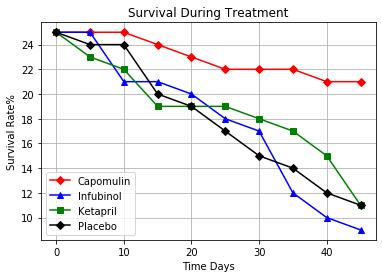

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate the Plot (Accounting for percentages)
Timepoint_mouse_count=Summary_mouse_count_reformat_df["Timepoint"]
Drug_Capomulin_mouse_count=Summary_mouse_count_reformat_df["Capomulin"]
Drug_Infubinol_mouse_count=Summary_mouse_count_reformat_df["Infubinol"]
Drug_Ketapril_mouse_count=Summary_mouse_count_reformat_df["Ketapril"]
Drug_Placebo_mouse_count=Summary_mouse_count_reformat_df["Placebo"]
Chart1_mouse_count,=plt.plot(Timepoint_mouse_count,Drug_Capomulin_mouse_count,marker="D",color="red",label="Capomulin")
Chart2_mouse_count,=plt.plot(Timepoint_mouse_count,Drug_Infubinol_mouse_count,marker="^",color="blue",label="Infubinol")
Chart3_mouse_count,=plt.plot(Timepoint_mouse_count,Drug_Ketapril_mouse_count,marker="s",color="green",label="Ketapril")
Chart4_mouse_count,=plt.plot(Timepoint_mouse_count,Drug_Placebo_mouse_count,marker="D",color="black",label="Placebo")

plt.legend(handles=[Chart1_mouse_count,Chart2_mouse_count,Chart3_mouse_count,Chart4_mouse_count,], loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time Days")
plt.ylabel("Survival Rate%")
plt.grid()
# Save the Figure

# Show the Figure
plt.show()
plt.savefig('Survival During Treatment.png')

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
Summary_First_Last=Summary_reformat_df.iloc[[0,-1]]
Summary_Percentage_Change=Summary_First_Last.pct_change(fill_method='ffill')
Summary_Percentage_Change.head()
Percent_Change=pd.DataFrame.transpose(Summary_Percentage_Change.iloc[[-1]])
Percent_Change
# Display the data to confirm


,9
Drug,
Timepoint,inf
Capomulin,-0.194753
Ceftamin,0.425165
Infubinol,0.461235
Ketapril,0.570288
Naftisol,0.539233
Placebo,0.512980
Propriva,0.472412
Ramicane,-0.223209


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

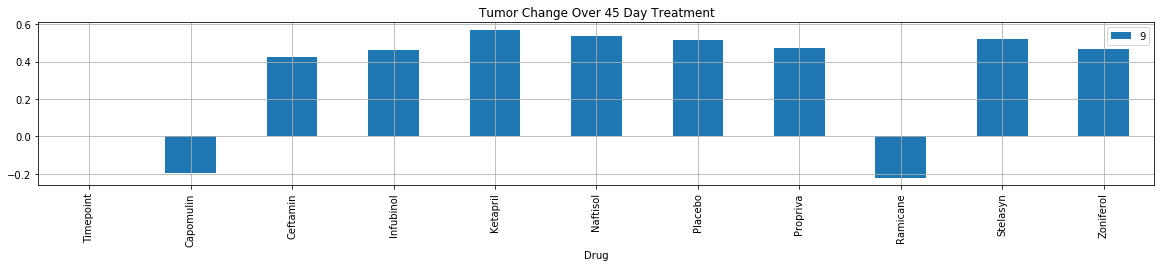

<Figure size 432x288 with 0 Axes>

In [18]:
# Store all Relevant Percent Changes into a Tuple

Percent_Change.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid()
plt.show()
plt.tight_layout()
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()
plt.savefig('Tumar Chage.png')

![Metastatic Spread During Treatment](../Images/change.png)